In [341]:
# Imports
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [342]:

# Parameters
V = 180
D = 50
r = 0.01
σ = 0.25
T = 10

In [343]:
# Time to maturity
dt = 1/1000
tau = np.arange(dt, T+dt, dt)

In [344]:
# Normal CDF
N = lambda x: stats.norm.cdf(x)

H = lambda V, T, L: np.exp(-r*T) * N( (np.log(V/L) + (r-0.5*σ**2)*T) / (σ*np.sqrt(T)) )

In [345]:
# Black-Scholes Call price
def C_BS(V, K, T):
    d1 = (np.log(V/K) + (r + 0.5*σ**2)*T ) / ( σ*np.sqrt(T) )
    d2 = d1 - σ*np.sqrt(T)
    return V*N(d1) - np.exp(-r*T)*K*N(d2)

# Senior Debt Call Price
def C_Ks(V, Ks, T):
    d1 = (np.log(V/Ks) + (r + 0.5*σ**2)*T ) / ( σ*np.sqrt(T) )
    d2 = d1 - σ*np.sqrt(T)
    return V*N(d1) - np.exp(-r*T)*Ks*N(d2)
# Junior Debt Call price
def C_Kj(V, Ks, Kj, T):
    d1 = (np.log(V/(Ks+Kj)) + (r + 0.5*σ**2)*T ) / ( σ*np.sqrt(T) )
    d2 = d1 - σ*np.sqrt(T)
    return V*N(d1) - np.exp(-r*T)*(Ks+Kj)*N(d2)



In [346]:
# Yield spreads (bps)
s = lambda Model: 10000 * (np.log(D/Model) / tau - r)

In [347]:
# Coordinates for plotting
x = tau


y_senior_low = s((V-90) - C_Ks((V-90), D, tau))
y_senior_high = s(V - C_Ks(V, D, tau))
y_junior_low = s(C_Ks((V-90), D, tau) - C_Kj((V-90),D , D, tau))
y_junior_high= s(C_Ks(V, D, tau) - C_Kj(V,D , D, tau))

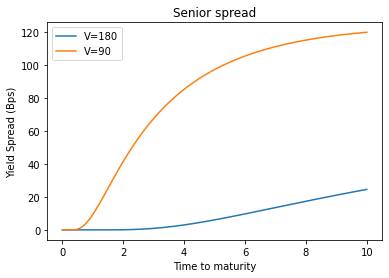

In [348]:
sns.lineplot(x=x, y=y_senior_high, label='V=180')
sns.lineplot(x=x, y=y_senior_low, label='V=90')
# plt.plot(x, y_senior_high, label='V=180')
# plt.plot(x, y_senior_low, label='V=90')
# plt.plot(x, y_junior_low)
plt.title('Senior spread')
plt.ylabel('Yield Spread (Bps)')
plt.xlabel('Time to maturity')
# plt.ylim(0, 200)
plt.show()

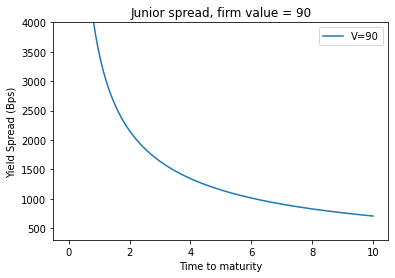

In [349]:
sns.lineplot(x=x, y=y_junior_low, label='V=90')
# plt.plot(x, y_junior_low)
plt.title('Junior spread, firm value = 90')
plt.ylabel('Yield Spread (Bps)')
plt.xlabel('Time to maturity')
plt.ylim(300, 4000)
plt.show()


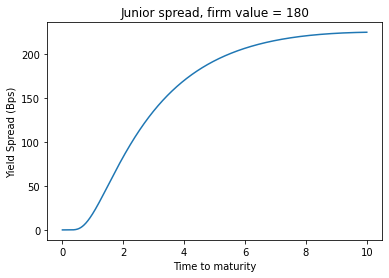

In [354]:
plt.plot(x, y_junior_high)
# plt.plot(x, y_junior_low)
plt.title('Junior spread, firm value = 180')
plt.ylabel('Yield Spread (Bps)')
plt.xlabel('Time to maturity')
# plt.ylim(y_junior_high.max()-20, y_junior_high.max()+20)
plt.show()

test =s(C_Ks(90, 50, 10) - C_Kj(90,50 , 50, 10))

#

In [351]:
print(y_junior_low.min())
print(y_junior_low.max())

print(y_junior_high.min())
print(y_junior_high.max())


704.46092390915
2231210.5145483324
-1.4879243670495867e-09
224.91445513467815
